<a href="https://colab.research.google.com/github/palberth/CienciaDatos-MASDI/blob/main/Ejemplo_1_R_Lineal_Boston_clase_1211.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Problema de Regresión con Scikit-Learn

Los modelos lineales son fundamentales tanto en estadística como en el aprendizaje automático, pues muchos métodos se apoyan en la combinación lineal de variables que describen los datos. Lo más sencillo será ajustar una línea recta con **LinearRegression**, pero veremos que contamos con un abaníco mucho más grande de herramientas.

Para mostrar cómo funcionan estos modelos vamos a emplear uno de los dataset que ya incorpora **scikit-learn**.

**[Scikit-Learn](https://scikit-learn.org/stable/index.html)** es una biblioteca para aprendizaje automático de software libre para el lenguaje de programación Python. ​Incluye varios algoritmos de clasificación, regresión y análisis de grupos entre los cuales están máquinas de vectores de soporte, bosques aleatorios, Gradient boosting, K-means y DBSCAN. Está diseñada para interoperar con las bibliotecas numéricas y científicas NumPy y SciPy.

In [ ]:
%autoreload 2

In [ ]:
%pip install gdown --quiet

In [ ]:
import gdown

url = 'https://drive.google.com/file/d/1UIXRM-BAzz5mWsc4Ff1YfQuAljKiWnQ1/view?usp=sharing'
output_path = 'HousingData.csv'
gdown.download(url, output_path, quiet=False,fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1UIXRM-BAzz5mWsc4Ff1YfQuAljKiWnQ1
To: /content/HousingData.csv
100%|██████████| 35.0k/35.0k [00:00<00:00, 44.1MB/s]


'HousingData.csv'

# **Regresión Lineal**
Se utiliza para estimar los valores reales (costo de las viviendas, el número de llamadas, ventas totales, etc.) basados en variables continuas. La idea es tratar de establecer la relación entre las variables independientes y dependientes ajustando la mejor línea recta con respecto a los puntos. Esta línea de mejor ajuste se conoce como línea de regresión.

Veamos un pequeño ejemplo de como se implementa en Python. En este ejemplo voy a utilizar el dataset Boston que ya viene junto con Scikit-learn y es ideal para practicar con Regresiones Lineales; el mismo contiene precios de casas de varias áreas de la ciudad de Boston.

[fuente](https://www.kaggle.com/henriqueyamahata/boston-housing-with-linear-regression)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# to make this notebook's output stable across runs
np.random.seed(42)

# **Dataset**: Pandas
Estructuración del dataset

In [ ]:
# estructura de nuestro dataset que leemos con pandas
boston_df = pd.read_csv('/content/HousingData.csv')
boston_df.rename(columns={'MEDV': 'TARGET'}, inplace=True)
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


El Boston dataset es un conjunto de datos para el análisis de los precios de las viviendas en la región de Boston. Con boston.DESCR podemos obtener una descripción del dataset, con información sobre el mismo, como el tipo de atributos.

**Descripción de los parametros del dataset.**

* CRIM: Índice de criminalidad per cápita por ciudad
* ZN: Proporción de suelo residencial para lotes de más de 25.000 pies cuadrados
* INDUS: Proporción de acres comerciales no minoristas por ciudad
* CHAS: Variable ficticia del río Charles (= 1 si la zona linda con el río; 0 en caso contrario)
* NOX: Concentración de óxido nítrico (partes por 10 millones)
* RM: Número medio de habitaciones por vivienda
* AGE: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940
* DIS: Distancias ponderadas a cinco centros de empleo de Boston
* RAD: Índice de accesibilidad a las autopistas radiales
* TAX: Tasa de impuesto sobre la propiedad por valor total de 10.000 $.
* PTRATIO: Ratio de alumnos por profesor por ciudad
* Bk: 1000(Bk - 0,63)², donde Bk es la proporción de [personas de origen afroamericano] por ciudad
* LSTAT: Porcentaje de la población de menor estatus
* **Target (MEDV): Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares**.

# **Análisis exploratorio y preprocesamiento de datos**

El análisis exploratorio de datos es un paso muy importante antes de entrenar el modelo. En esta sección, utilizaremos algunas visualizaciones para comprender la relación de la variable objetivo con otras características.


## 1. Observar los tipos de datos y la presencia de valores nulos

In [ ]:
# info de nuestro dataset
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  TARGET   506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# Revisamos si hay valores nulos
boston_df.isnull().sum()


,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


Se observa que todos los atributos del dataset son de tipo numérico y que algunos atributos tienen valores nulos.

### Como tratar los datos faltantes

1. **Eliminar los valores faltantes**  
   - **Descripción**: Remover filas o columnas con datos faltantes.
   - **Cuándo usar**: Cuando los valores faltantes son pocos y su eliminación no afectará el análisis.
   - **Ventajas**: Sencillo de implementar.
   - **Desventajas**: Reduce el tamaño de la muestra.

2. **Imputar los valores faltantes**  
   - **Descripción**: Reemplazar valores faltantes con estimaciones (media, mediana, moda, KNN, regresión).
   - **Cuándo usar**: Para preservar el tamaño de los datos.
   - **Ventajas**: Evita la pérdida de información.
   - **Desventajas**: Puede introducir sesgo.

3. **No hacer nada**  
   - **Descripción**: No recomendado en Scikit-learn, aunque algunos algoritmos como XGBoost o LightGBM pueden manejar valores faltantes.
   - **Cuándo usar**: Al emplear modelos que soportan valores faltantes.
   - **Ventajas**: No introduce suposiciones.
   - **Desventajas**: No aplicable en muchos modelos sin preprocesamiento.

4. **Nueva categoría para valores faltantes (categóricos)**  
   - **Descripción**: Crear una categoría para los valores faltantes en variables categóricas.
   - **Cuándo usar**: En variables categóricas donde los valores faltantes puedan ser distintivos.
   - **Ventajas**: Evita pérdida de datos y permite identificar patrones en los faltantes.
   - **Desventajas**: No aplicable a datos numéricos.

5. **Imputación múltiple**  
   - **Descripción**: Genera varias versiones de datos imputados y promedia los resultados (ej. MICE).
   - **Cuándo usar**: En análisis estadísticos avanzados.
   - **Ventajas**: Menos sesgado, incluye la incertidumbre.
   - **Desventajas**: Costoso en tiempo y recursos.

6. **Usar algoritmos que manejan valores faltantes**  
   - **Descripción**: Algoritmos como LightGBM pueden manejar valores faltantes sin preprocesamiento.
   - **Cuándo usar**: Si el modelo soporta valores faltantes.
   - **Ventajas**: Simplifica el preprocesamiento.
   - **Desventajas**: Limitado a ciertos modelos.

**Consejo**: Prueba varios métodos y evalúa el impacto en los resultados para elegir la mejor estrategia.

Referencia: [How to Handle Missing Data](https://medium.com/@pingsubhak/handling-missing-values-in-dataset-7-methods-that-you-need-to-know-5067d4e32b62)

### Como tratar los datos faltantes en Producción

Cuando se está desarrollando un modelo de aprendizaje automático, para resolver un problema de negocio, es importante tener en cuenta que el modelo se utilizará en producción. Por lo tanto, es fundamental que el modelo pueda manejar datos faltantes en producción. Aquí hay algunas estrategias para manejar datos faltantes en producción:

1. **Identificar el origen de los datos faltantes**: Es importante identificar la razón por la que faltan los datos. ¿Es un error en la entrada de datos? ¿Es un problema con el sistema de recolección de datos? ¿Es un problema con el sistema de almacenamiento de datos? Identificar la causa raíz del problema puede ayudar a prevenir futuros problemas con datos faltantes.
2. **Establecer un proceso de monitoreo**: Es importante establecer un proceso de monitoreo para detectar datos faltantes en producción. Esto puede incluir la implementación de alertas automáticas para notificar a los equipos de operaciones y de ciencia de datos cuando se detecten datos faltantes.
3. **Establecer un proceso de recuperación**: Es importante establecer un proceso de recuperación para manejar datos faltantes en producción. Esto puede incluir la implementación de algoritmos de imputación de datos faltantes en tiempo real, o la implementación de un sistema de respaldo para recuperar datos faltantes.
4. **Establecer un proceso de validación**: Es importante establecer un proceso de validación para verificar que los datos imputados sean precisos y confiables. Esto puede incluir la implementación de pruebas automatizadas para verificar la calidad de los datos imputados.
5. **Establecer un proceso de comunicación**: Es importante establecer un proceso de comunicación para informar a los usuarios finales sobre los datos faltantes y las acciones tomadas para manejarlos. Esto puede incluir la implementación de mensajes de error claros y concisos para informar a los usuarios finales sobre los datos faltantes.

In [ ]:
# En este ejemplo, reemplazamos los valores nulos por la media de la columna
boston_df['CRIM'] = boston_df['CRIM'].fillna(boston_df['CRIM'].mean())
boston_df['ZN'] = boston_df['ZN'].fillna(boston_df['ZN'].mean())
boston_df['INDUS'] = boston_df['INDUS'].fillna(boston_df['INDUS'].mean())
boston_df['CHAS'] = boston_df['CHAS'].fillna(boston_df['CHAS'].mean())
boston_df['AGE'] = boston_df['AGE'].fillna(boston_df['AGE'].mean())
boston_df['LSTAT'] = boston_df['LSTAT'].fillna(boston_df['LSTAT'].mean())

In [ ]:
boston_df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


## 2. Correlación de las variables con la variable objetivo

La correlación es una medida estadística que describe la relación entre dos variables. La correlación puede ser positiva (las variables aumentan juntas), negativa (una variable disminuye cuando la otra aumenta) o nula (no hay relación entre las variables).

La correlación se mide en una escala de -1 a 1. Un valor de 1 indica una correlación positiva perfecta, un valor de -1 indica una correlación negativa perfecta y un valor de 0 indica que no hay correlación.

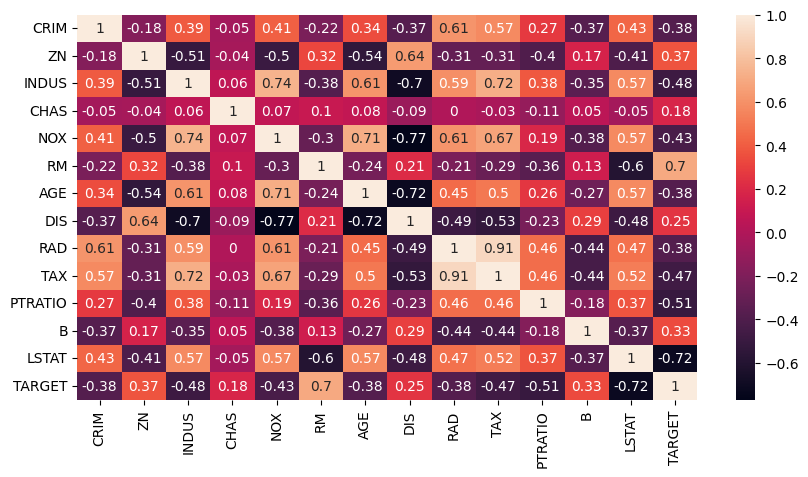

In [ ]:
plt.figure(figsize=(10, 5))
correlation_matrix = boston_df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

### **Observación**

Para ajustar un modelo de regresión lineal, seleccionamos aquellas características que tienen una alta correlación con la variable objetivo **TARGET**.

*   Observando la matriz de correlación podemos ver que **RM**(average number of rooms per dwelling (viviendas)) tiene una fuerte correlación positiva con **TARGET** (0,7), mientras que **LSTAT**(proportion of adults without, some high school education and proportion of male workers classified as laborers) tiene una alta correlación negativa con **TARGET** (-0,74).
*   Adicionalmente variables como **INDUS**, **TAX**, **PTRATIO**, **NOX**, **CRIM** y **AGE** tienen una correlación significativa con **TARGET**.

* Un punto importante en la selección de características para un modelo de regresión lineal es la comprobación de la multicolinealidad. Las características RAD, TAX tienen una correlación de 0,91. Estos pares de características están fuertemente correlacionados entre sí. No deberíamos seleccionar estas dos características juntas para entrenar el modelo.Lo mismo ocurre con la característica DIS, que tiene una correlación alta con varias características como INDUS, NOX, AGE, etc.

- **Multicolinealidad**: La multicolinealidad es una condición en la que dos o más variables independientes están altamente correlacionadas. La multicolinealidad puede causar problemas en un modelo de regresión lineal, como la inestabilidad de los coeficientes y la falta de precisión en la estimación de los coeficientes.


**Consejo**: Selecciona características que tengan una alta correlación con la variable objetivo y baja correlación entre sí.

- Teniendo en cuenta las observaciones anteriores, se descartarán las características **RAD** y **DIS**, que presentan una alta correlación con otras características.
- Se descartará tambien la característica **CHAS** que tiene una correlación baja con la variable objetivo.


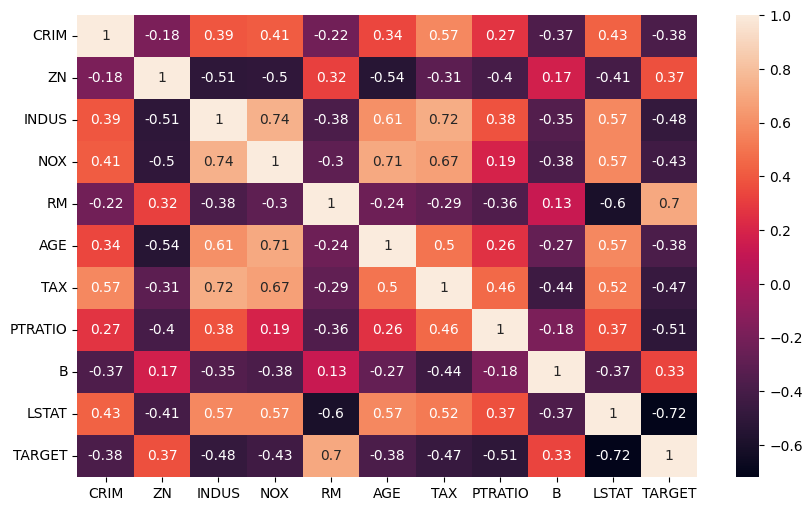

In [ ]:
# drop RAD and DIS columns
# annot = True to print the values inside the square
boston_df_clean = boston_df.drop(['RAD', 'DIS', 'CHAS'], axis=1)

plt.figure(figsize=(10, 6))
correlation_matrix = boston_df_clean.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()


## 3. Visualización de las características

La visualización de las características es una parte importante del análisis exploratorio de datos. La visualización de las características puede ayudar a identificar patrones, tendencias y relaciones en los datos.

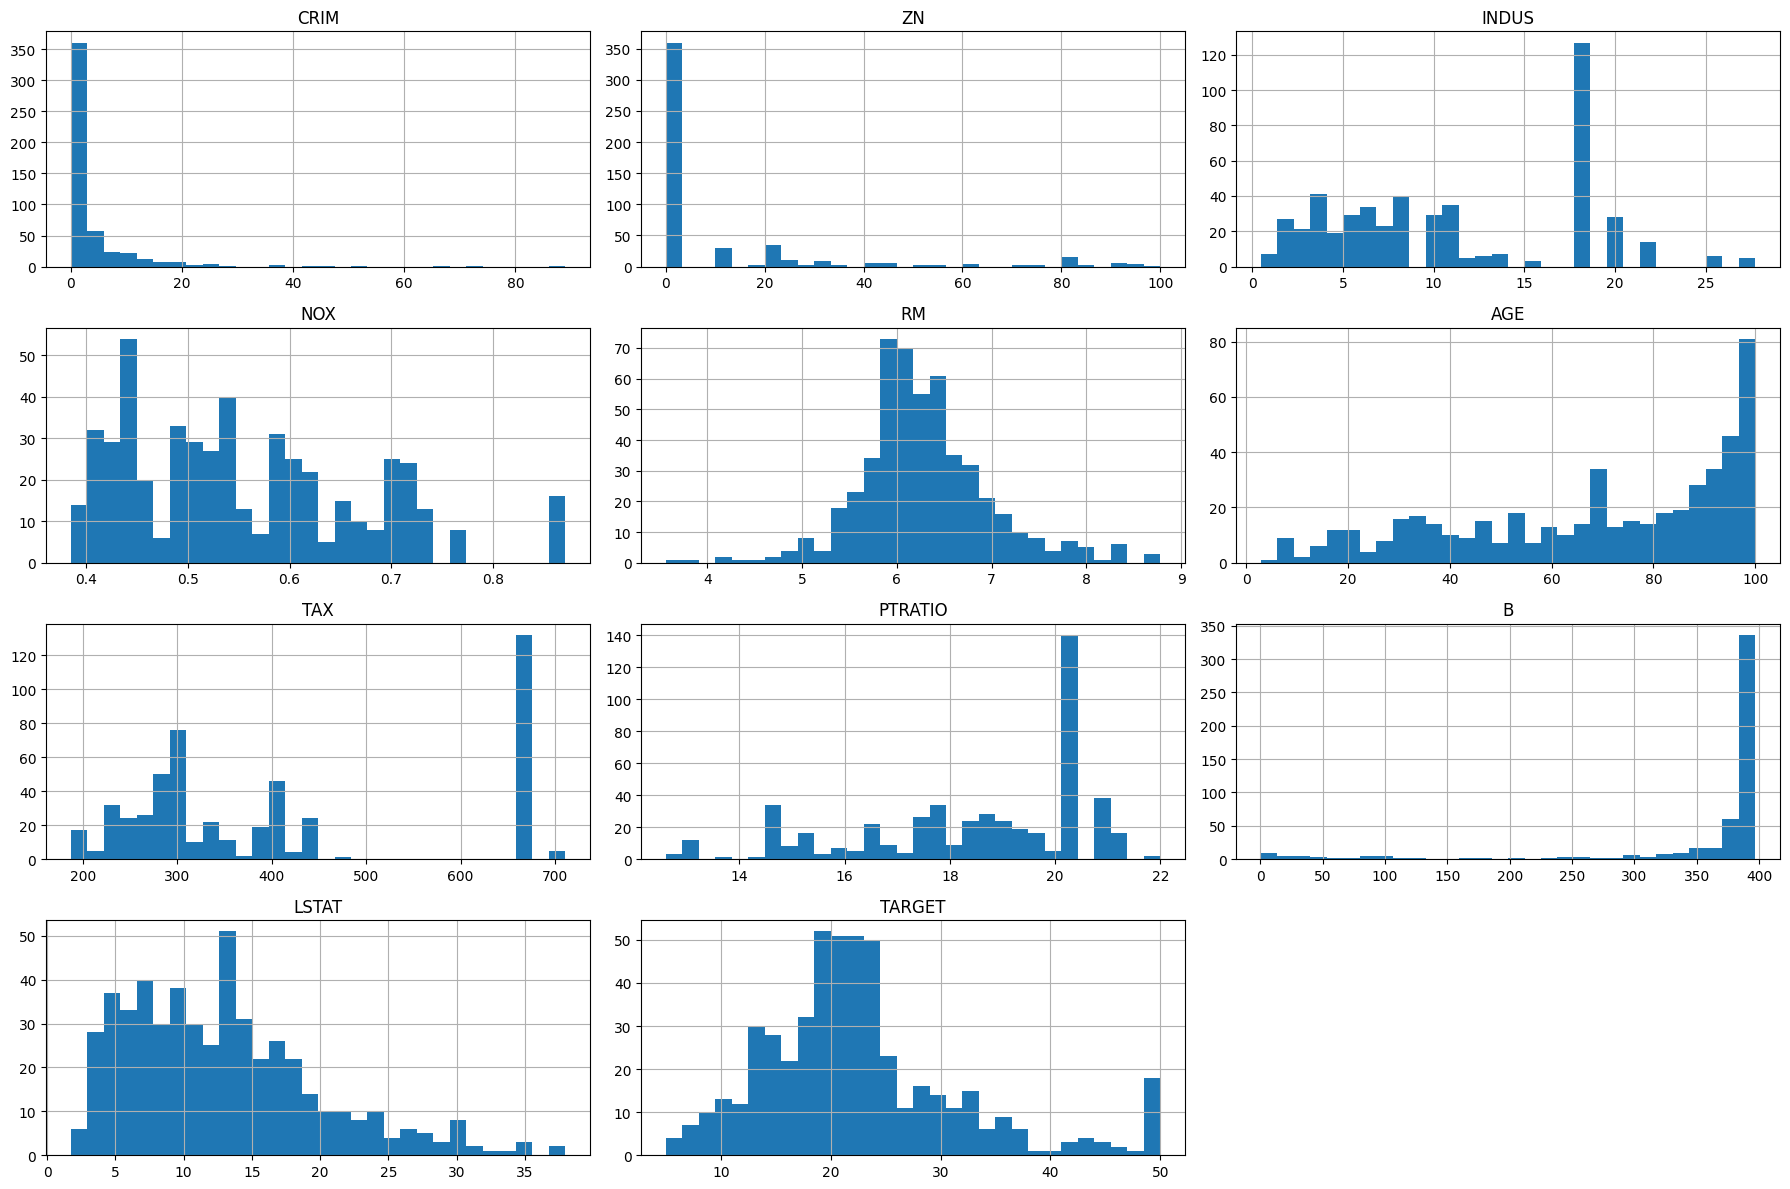

In [ ]:
# plot the histogram of all the features in the dataset
boston_df_clean.hist(bins=30, figsize=(18,12))
plt.tight_layout()
plt.show()

### **Observación**

- **RM**: El número medio de habitaciones por vivienda tiene una relación positiva con el precio de la vivienda. A medida que el número medio de habitaciones por vivienda aumenta, el precio de la vivienda también aumenta.
- **LSTAT**: El porcentaje de la población de menor estatus tiene una relación negativa con el precio de la vivienda. A medida que el porcentaje de la población de menor estatus aumenta, el precio de la vivienda disminuye.
- **INDUS**: La proporción de acres comerciales no minoristas por ciudad tiene una relación negativa con el precio de la vivienda. A medida que la proporción de acres comerciales no minoristas por ciudad aumenta, el precio de la vivienda disminuye.

- En la figura tambien es posible observar que las variables tienen una escala diferente. Por lo tanto, es importante estandarizar las características antes de ajustar el modelo de regresión lineal.
- La estandarización de las características implica restar la media y dividir por la desviación estándar. La estandarización de las características ayuda a que todas las características tengan la misma escala y facilita la convergencia del modelo de regresión lineal.


## 4. Distribución de la variable objetivo

La variable objetivo es la variable que estamos tratando de predecir. En este caso, la variable objetivo es el precio medio de las viviendas ocupadas por sus propietarios en miles de dólares (MEDV).

### **Observación**

- La variable objetivo tiene una distribución normal con algunos valores atípicos. Los valores atípicos son valores que se desvían significativamente de la distribución normal de los datos. Los valores atípicos pueden afectar negativamente la precisión del modelo de regresión lineal. Por lo tanto, es importante identificar y tratar los valores atípicos antes de ajustar el modelo de regresión lineal.

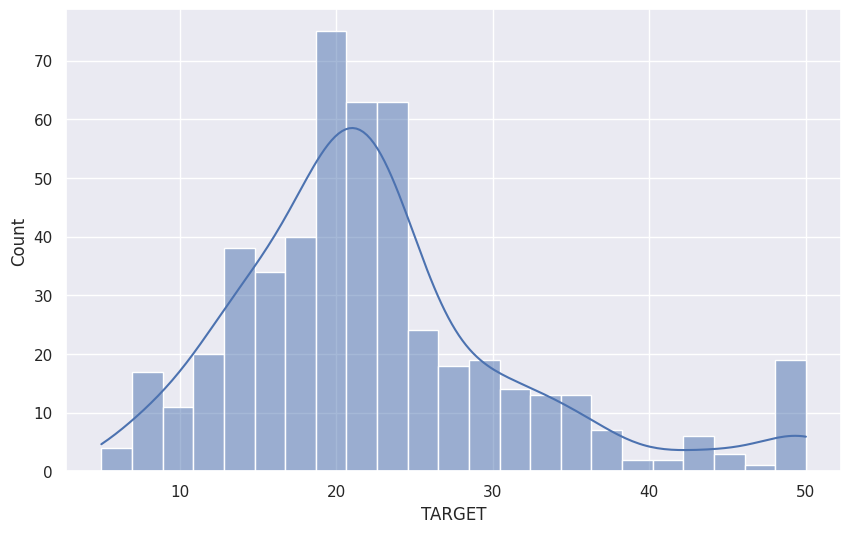

In [ ]:
sns.set_theme(rc={'figure.figsize':(10,6)})
sns.histplot(boston_df['TARGET'], kde=True)
plt.show();

# Definición Configuración experimentos de Machine Learning

Se crearan 3 configuraciones de datasets para entrenar y evaluar modelos de regresión, a partir de las observaciones realizadas en el análisis exploratorio de datos.

1. **Configuración 1**: Utilizar todas las características excepto RAD, DIS y CHAS. Sin transformación de características.
2. **Configuración 2**: Aplicar estandarización a las características y utilizar todas las características excepto RAD, DIS y CHAS.
3. **Configuración 3**: Utilizar solamente las características RM y LSTAT. Incluyendo la estandarización de características.

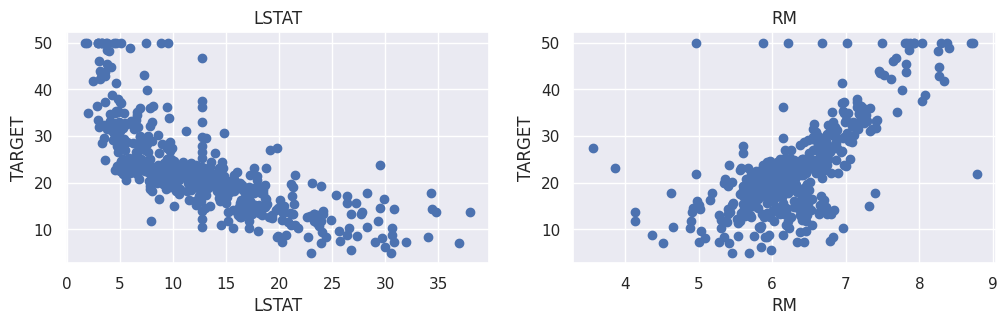

In [ ]:
# características que presentan una correlación alta con la variable objetivo
plt.figure(figsize=(12, 3))

features = ['LSTAT', 'RM']
target = boston_df['TARGET']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('TARGET')

## Creación de los datasets


In [ ]:
##Utilizar el paquete sklearn.model_selection
from sklearn.model_selection import train_test_split

### Dataset 1: Todas las características excepto RAD, DIS y CHAS

In [ ]:
X_full = boston_df_clean.drop(['TARGET'], axis=1)
y_full = boston_df_clean['TARGET']

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

In [ ]:
X_train_full.shape, X_test_full.shape, y_train_full.shape, y_test_full.shape

((404, 10), (102, 10), (404,), (102,))

### Dataset 2: Aplicar estandarización a las características y utilizar todas las características excepto RAD, DIS y CHAS

**observación**: La estandarización de las características implica restar la media y dividir por la desviación estándar. Al usar nuevos datos para predecir, es importante aplicar la misma transformación a los datos de prueba.

Por lo tanto, es importante guardar la media y la desviación estándar de las características en el conjunto de entrenamiento para aplicar la misma transformación a los datos de prueba.

In [ ]:
# install yaml for python
#%pip install pyyaml --quiet

In [ ]:
# Normalizamos los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)
X_scaled = pd.DataFrame(X_scaled, columns=X_full.columns)

scale_mean = scaler.mean_
scale_std = scaler.scale_

import yaml
with open("scale_mean.yaml", "w") as f:
    yaml.dump({"scale_mean": scale_mean.tolist(), "scale_std": scale_std.tolist()}, f)


X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_full, test_size=0.2, random_state=42)

In [ ]:
# prompt: cargar un archivo .yaml

import yaml

with open("scale_mean.yaml", "r") as f:
    try:
        config = yaml.safe_load(f)
        print(config)
    except yaml.YAMLError as exc:
        print(exc)


{'scale_mean': [3.611873971193416, 11.211934156378602, 11.083991769547326, 0.5546950592885376, 6.284634387351779, 68.5185185185185, 408.2371541501976, 18.455533596837945, 356.6740316205534, 12.715432098765433], 'scale_std': [8.537321779593817, 22.89839090183127, 6.692541754099837, 0.11576311540656137, 0.7019225143345689, 27.41233866227837, 168.37049503938118, 2.1628051914821365, 91.20460745217277, 7.005805929220683]}


### Dataset 3: Utilizar solamente las características RM y LSTAT. Incluyendo la estandarización de características.


In [ ]:
X_small = boston_df_clean[["LSTAT","RM"]]
y_small = boston_df_clean["TARGET"]

X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

# Entrenamiento y evaluación de modelos de regresión

En esta sección, entrenaremos y evaluaremos modelos de regresión utilizando las configuraciones de datasets definidas anteriormente. Se utilizarán los siguientes modelos de regresión:

1. Regresión lineal
2. Arbol de decisión
3. Random Forest
4. XGBoost

In [ ]:
# install xgboost
#%pip install xgboost --quiet

In [ ]:
import os                # Librería para manipular archivos
import joblib            # Librería para guardar y cargar modelos
import pandas as pd      # Librería para manipulación de datos
from sklearn.linear_model import LinearRegression # Modelo de regresión lineal
from sklearn.tree import DecisionTreeRegressor    # Modelo de árbol de decisión
from sklearn.ensemble import RandomForestRegressor # Modelo de bosque aleatorio
from xgboost import XGBRegressor                  # Modelo de XGBoost
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error # Métricas de evaluación

## Opción 1 - Uno a uno

A continuación se procederá a entrenar y evaluar los modelos de regresión para cada configuración de dataset definida anteriormente.

In [ ]:
# crear modelos
rl_model = LinearRegression()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()

models_names = ["Linear Regression", "Decision Tree", "Random Forest", "XGBoost"]

# Entrenamiento de los modelos
rl_model.fit(X_train_full, y_train_full)
dt_model.fit(X_train_full, y_train_full)
rf_model.fit(X_train_full, y_train_full)
xgb_model.fit(X_train_full, y_train_full)

# Predicción de los modelos
rl_pred = rl_model.predict(X_test_full)
dt_pred = dt_model.predict(X_test_full)
rf_pred = rf_model.predict(X_test_full)
xgb_pred = xgb_model.predict(X_test_full)

In [ ]:
# Evaluación de los modelos con las métricas
rl_mse = mean_squared_error(y_test_full, rl_pred)
rl_rmse = np.sqrt(rl_mse)
rl_mae = mean_absolute_error(y_test_full, rl_pred)
rl_r2 = r2_score(y_test_full, rl_pred)

dt_mse = mean_squared_error(y_test_full, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_test_full, dt_pred)
dt_r2 = r2_score(y_test_full, dt_pred)

rf_mse = mean_squared_error(y_test_full, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test_full, rf_pred)
rf_r2 = r2_score(y_test_full, rf_pred)

xgb_mse = mean_squared_error(y_test_full, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test_full, xgb_pred)
xgb_r2 = r2_score(y_test_full, xgb_pred)



In [ ]:
# Crear un dataframe con las métricas de los modelos
models_metrics = pd.DataFrame({
    "Model": models_names,
    "MSE": [rl_mse, dt_mse, rf_mse, xgb_mse],
    "RMSE": [rl_rmse, dt_rmse, rf_rmse, xgb_rmse],
    "MAE": [rl_mae, dt_mae, rf_mae, xgb_mae],
    "R2": [rl_r2, dt_r2, rf_r2, xgb_r2],
    "config": ["full", "full", "full", "full"]
})

In [ ]:
models_metrics.to_excel("models_metrics.xlsx", index=False)

## Opción 2 - Función para entrenar y evaluar modelos

El uso de funciones para entrenar y evaluar modelos es una buena práctica de programación. Las funciones ayudan a reutilizar el código y a mantener el código limpio y organizado.

In [ ]:
def train_and_evaluate_models():
    """
    Entrena, evalúa y opcionalmente guarda múltiples modelos de regresión en los datos de entrenamiento y prueba.

    Esta función entrena una serie de modelos de regresión en el conjunto de datos de entrenamiento
    (X_train, y_train) y luego realiza predicciones sobre el conjunto de datos de prueba (X_test).
    Calcula las métricas de evaluación: MSE, RMSE, MAE y R² para cada modelo y retorna un DataFrame
    con los resultados. Opcionalmente, guarda cada modelo entrenado.

    Parámetros:
    ----------
    models : list of tuples (str, model)
        Una lista de tuplas donde cada tupla contiene el nombre del modelo y el objeto del modelo.
    X_train : array-like or DataFrame
        Conjunto de características para el entrenamiento del modelo.
    y_train : array-like
        Conjunto de valores objetivo correspondientes a X_train.
    X_test : array-like or DataFrame
        Conjunto de características para la evaluación del modelo.
    y_test : array-like
        Conjunto de valores objetivo correspondientes a X_test.
    config : str
        Configuración del dataset a utilizar. Puede ser 'full', 'scaled' o 'small'.
    save_models : bool, opcional
        Si es True, guarda cada modelo entrenado en un archivo `.joblib`. El valor predeterminado es True.

    Retorna:
    -------
    results_df : DataFrame
        Un DataFrame que contiene las métricas de rendimiento (MSE, RMSE, MAE, R²) para cada modelo,
        junto con el nombre del modelo evaluado. El DataFrame tiene las siguientes columnas:
        - 'Model': Nombre del modelo.
        - 'MSE': Error cuadrático medio (Mean Squared Error).
        - 'RMSE': Raíz del error cuadrático medio (Root Mean Squared Error).
        - 'MAE': Error absoluto medio (Mean Absolute Error).
        - 'R²': Coeficiente de determinación R².
        - 'Config': Configuración del dataset.

    Ejemplo de uso:
    ---------------
    results_df = train_and_evaluate_models(X_train, y_train, X_test, y_test, config='full')
    print(results_df)
    """
    results = []

In [ ]:
# Lista de modelos a evaluar


In [ ]:
# Entrenar y evaluar modelos en el conjunto de datos completo

# Entrenar y evaluar modelos en el conjunto de datos escalado

# Entrenar y evaluar modelos en el conjunto de datos pequeño

# concatenar los resultados en un solo DataFrame


In [ ]:
results.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el tamaño de la figura y el estilo
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparación de Rendimiento de Modelos para Diferentes Configuraciones de Dataset')

# Lista de métricas para iterar
metrics = ['MSE', 'RMSE', 'MAE', 'R²']
titles = ['Error Cuadrático Medio (MSE)', 'Raíz del Error Cuadrático Medio (RMSE)', 'Error Absoluto Medio (MAE)', 'Coeficiente de Determinación (R²)']

# Crear un subplot para cada métrica
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    sns.barplot(
        data=results, x='Model', y=metric, hue='Config', ax=ax
    )
    ax.set_title(titles[i])
    ax.set_xlabel('Modelo')
    ax.set_ylabel(metric)
    ax.legend(title='Configuración')

# Ajustar el layout para mejorar la visualización
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Interpretación de Resultados y Selección de Modelo

## Análisis de las Métricas
Cada métrica ofrece una perspectiva diferente sobre el rendimiento de los modelos:

- **MSE (Error Cuadrático Medio)**: Mide el error cuadrático promedio, penalizando fuertemente los errores grandes. Es útil para detectar modelos que producen predicciones erróneas con valores extremos.
- **RMSE (Raíz del Error Cuadrático Medio)**: Es la raíz cuadrada del MSE y **tiene las mismas unidades que la variable objetivo**. Es una métrica útil para interpretar en el contexto de los datos originales.
- **MAE (Error Absoluto Medio)**: Representa el error promedio en las predicciones, penalizando todos los errores de la misma forma, sin importar su tamaño. Es una métrica menos sensible a valores extremos en comparación con el MSE y RMSE. También tiene las **mismas unidades que la variable objetivo**.
- **R² (Coeficiente de Determinación)**: Indica el porcentaje de variabilidad de la variable objetivo explicada por el modelo. Valores cercanos a 1 indican un buen ajuste, mientras que valores cercanos a 0 indican que el modelo no explica bien la variabilidad de los datos.

Para seleccionar el modelo deseado, **RMSE y MAE son métricas útiles**, ya que nos permiten observar el error promedio en el mismo rango que la variable objetivo y no están tan sesgadas por errores extremos como el MSE. **R²** es otra métrica importante, pues ayuda a entender qué tan bien el modelo ajusta los datos. En conjunto, RMSE, MAE, y R² suelen proporcionar una visión completa para seleccionar el modelo.

## Interpretación de los Resultados
Al observar los resultados:

- **Linear Regression** presenta un rendimiento similar en todas las configuraciones de dataset (full, scaled, small), con valores de error relativamente altos y un R² moderado. Esto se debe a que la Regresión Lineal es sensible a relaciones lineales y puede no capturar toda la complejidad de los datos.
- **Decision Tree** muestra una mejora notable en las métricas en comparación con Linear Regression, especialmente en el dataset "scaled". Sin embargo, la variabilidad entre configuraciones es mayor, lo cual puede indicar sobreajuste en configuraciones con menos variables.
- **Random Forest y XGBoost** tienden a tener el mejor rendimiento en todas las métricas, especialmente en configuraciones "full" y "scaled". Estos modelos son menos sensibles al escalado de datos y generalmente ofrecen resultados consistentes debido a sus enfoques de ensamble y aprendizaje iterativo.

## Impacto de Escalar los Datos en el Boston Dataset
En el caso de la Regresión Lineal, **no se observa un impacto significativo al escalar los datos**. Esto ocurre porque el Boston Dataset contiene variables que, aunque están en diferentes escalas, no están muy desbalanceadas en términos de su rango. La Regresión Lineal puede verse afectada por la escala, pero en este caso, la estandarización no mejora notablemente el rendimiento, posiblemente porque las variables no lineales o la multicolinealidad afectan más la precisión de este modelo.

Además, modelos como **árboles de decisión, bosques aleatorios (Random Forest), y XGBoost** no requieren normalización de datos, ya que estos modelos dividen el espacio de características en función de valores de umbral. Como resultado, funcionan de manera efectiva sin necesidad de escalado, y los valores de las métricas para estos modelos son consistentes en las configuraciones "full" y "scaled".

## Conclusión y Selección del Modelo
En este caso, **Random Forest y XGBoost** destacan por su rendimiento robusto en todas las configuraciones de dataset. Ambos modelos son ideales para el Boston Dataset, ya que pueden capturar relaciones no lineales y no requieren escalado. Si tu prioridad es minimizar los errores de predicción, te recomendaría considerar XGBoost, que ofrece el mejor RMSE, MAE y R², lo cual lo hace una elección sólida para este problema de regresión.

## Configuraciones del Dataset
Las tres configuraciones se estructuraron así:

1. **Configuración 1 (Full)**: Utiliza todas las características, excepto algunas que no contribuyen significativamente a la predicción (RAD, DIS, y CHAS). Esta configuración ayuda a explorar el impacto completo de las variables.
2. **Configuración 2 (Scaled)**: Similar a la Configuración 1 pero con estandarización de características, explorando si el escalado impacta el rendimiento de los modelos.
3. **Configuración 3 (Small)**: Solo utiliza las características más relevantes (RM y LSTAT), que muestran alta correlación con el objetivo.


# Guardar y Cargar Modelos para Reutilización Posterior

Para guardar los modelos entrenados y reutilizarlos posteriormente, puedes usar las bibliotecas `joblib` o `pickle`. A continuación se muestra cómo hacerlo utilizando `joblib`, que es especialmente eficiente para modelos grandes y estructuras de datos de numpy.

## Ejemplo de uso con `joblib`

1. **Guardar el modelo:**
   Después de entrenar cada modelo, guárdalo en un archivo `.joblib` con `joblib.dump`.

```python
import joblib
import os
from sklearn.linear_model import LinearRegression
# Crear una carpeta para guardar los modelos
os.makedirs('saved_models', exist_ok=True)

# Definir el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train_full, y_train_full)

model_name = 'Linear Regression'
# Guardar el modelo en un archivo
filename = f'saved_models/{model_name.replace(" ", "_")}.joblib'
joblib.dump(model, filename)
print(f'Modelo {name} guardado en {filename}')
```

2. **Cargar el modelo:**
   Cuando necesites reutilizar el modelo, cárgalo usando `joblib.load`.


In [ ]:
import joblib
import os

# Cargar y utilizar un modelo guardado
def load_and_predict(model_name, X_test):
    filename = f'saved_models/{model_name.replace(" ", "_")}.joblib'
    # Cargar el modelo desde el archivo
    loaded_model = joblib.load(filename)
    # Hacer predicciones
    predictions = loaded_model.predict(X_test)
    return predictions

In [ ]:


print(f'R²: {score_r2:.3f}')
print(f'MSE: {score_mse:.3f}')
print(f'RMSE: ${score_rmse:.3f}K')
print(f'MAE: ${score_mae:.3f}K')


In [ ]:
results[results['Model'] == 'XGBoost']

---

# Visualización de la Regresión Lineal con una sola característica

En el ejemplo anterior, entrenamos el modelo con dos características. Ahora, entrenaremos el modelo con una sola característica y veremos cómo afecta el rendimiento del modelo. Adicionalmente, al entrenar el modelo con una sola característica, podemos visualizar la línea de regresión en un gráfico 2D.

In [ ]:
X = boston_df['RM']
X = np.transpose(np.atleast_2d(X))
Y = boston_df["TARGET"]

lr = LinearRegression(fit_intercept=True)

lr.fit(X, Y)


fig,ax = plt.subplots()
ax.set_xlabel("Average number of rooms")
ax.set_ylabel("House Price")
ax.scatter(X, Y)
xmin = X.min()
xmax = X.max()

ax.plot([xmin, xmax], lr.predict([[xmin], [xmax]])  , '-',color=(.9,.3,.3), lw=4)
plt.show()

In [ ]:
x = boston_df['LSTAT']
x = np.transpose(np.atleast_2d(x))
Y = boston_df["TARGET"]

lr = LinearRegression(fit_intercept=True)

X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state=5)

lr.fit(X_train, Y_train)

# model evaluation for testing set
y_test_predict = lr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
mae = mean_absolute_error(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {:.2f}'.format(rmse))
print('R2 score is {:.2f}'.format(r2))
print('MAE is ${:.2f}K'.format(mae))

# Preguntas y Actividades.

**Comprobar las siguientes preguntas**

1. Se podría mejorar el rendimiento de la regresión que asocia LSTAT y House Price utilizando una regresión polinomial?.

2. Se realizó el entrenamiento del modelo de regresión líneal inicial utilizando solamente dos características del dataset, que ocurriría si se utilizan todas las características del mismo. ¿mejoraría el rendimiento del modelo?

3. Repita el paso anterior, utilizando como entrada del modelo solo las caracterterísticas que tienen una correlación con el precio de las casas mayor a 0.5 o -0.5. Tenga en cuenta la recomendación dada en este cuaderno con las caracteristicas que tienen alta correlación con otra característica que no sea el Target. ¿mejoraría el rendimiento del modelo?

4. Muestre los coeficientes asignados por el modelo a cada una de las características de los puntos 2 y 3. ¿Cuales son sus conclusiones a partir del resultado visualizado? (**modelo.coef_**)
5. Mejoraría el rendimiento del modelo aplicando la transformación de las caracteristicas? es decir, aplicando normalización.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
"Creates a polynomial regression model for the given degree"
# Polynomial Regression (degree 2)
poly_features = PolynomialFeatures(degree=2) # incrementa el número de features
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))

In [ ]:
# Plotting linear regression
fig, ax = plt.subplots()
ax.set_xlabel("LSTAT")
ax.set_ylabel("House Price")
ax.scatter(boston_df['LSTAT'], boston_df["TARGET"], label="Data Points")
xmin = X_train.min()
xmax = X_train.max()
ax.plot([xmin, xmax], lr.predict([[xmin], [xmax]]), '-', color=(.9, .3, .3), lw=4, label="Linear Fit")

# Performance of linear model
rendimiento = lr.score(X_test, Y_test) # devuelve el coeficiente R2

# Plotting polynomial regression
x_range = np.linspace(xmin, xmax, 100).reshape(-1, 1)
y_poly_pred = poly_model.predict(poly_features.transform(x_range))
ax.plot(x_range, y_poly_pred, color="blue", lw=2, label="Polynomial Fit (degree=2)")

rendimiento_poly = poly_model.score(poly_features.fit_transform(X_test), Y_test) # devuelve el coeficiente R2

# Displaying legend and title
ax.legend()
plt.title("Polynomial vs Linear Regression")

# Añadir el valor de R² dentro de la figura
plt.text(0.75, 0.8, f'$R^2 - Linear= {rendimiento:.2f}$', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.75, 0.75, f'$R^2 - Poly= {rendimiento_poly:.2f}$', fontsize=12, transform=plt.gca().transAxes)

plt.show()


In [ ]:
# model evaluation for training set
y_train_predicted = poly_model.predict(X_train_poly)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predicted)))
r2 = r2_score(Y_train, y_train_predicted)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {:.2f}'.format(rmse))
print('R2 score is {:.2f}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predicted)))
r2 = r2_score(Y_test, y_test_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {:.2f}'.format(rmse))

print('R2 score is {:.2f}'.format(r2))